In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("Fifa 23 Players Data.csv", delimiter= ",")
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [3]:
features = ["Overall", "Potential", "Value(in Euro)", "BaseStats"]
df = df.dropna(subset=features)
data = df[features].copy()
data.head()

,Overall,Potential,Value(in Euro),BaseStats
0,91,91,54000000,452
1,91,91,64000000,455
2,91,91,84000000,458
3,91,91,107500000,483
4,91,95,190500000,470


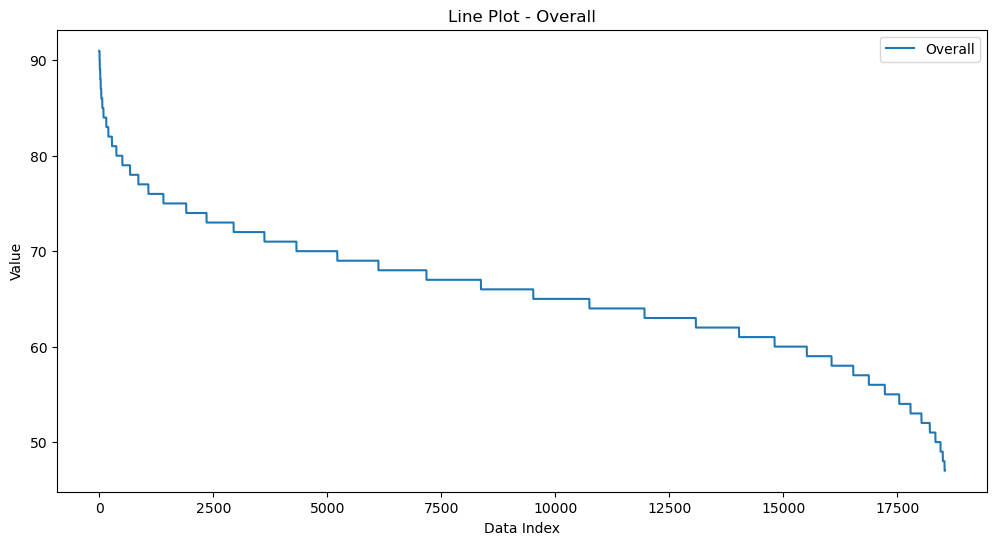

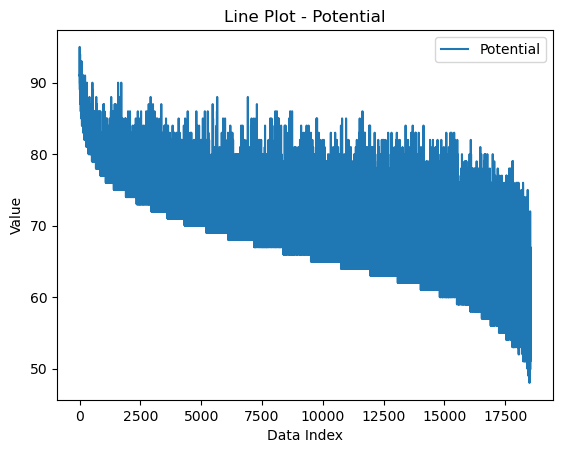

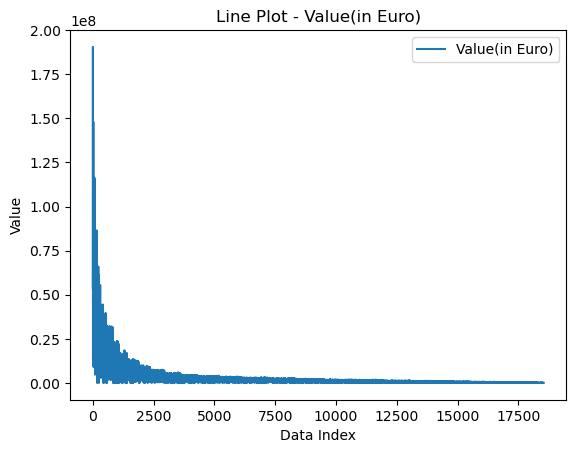

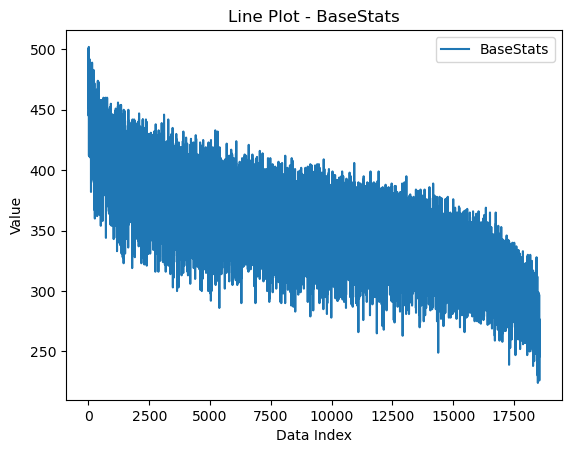

In [4]:
# Visualisasi Line Plot
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.plot(data[column], label=column)
    plt.xlabel('Data Index')
    plt.ylabel('Value')
    plt.title('Line Plot - {}'.format(column))
    plt.legend()
    plt.show()

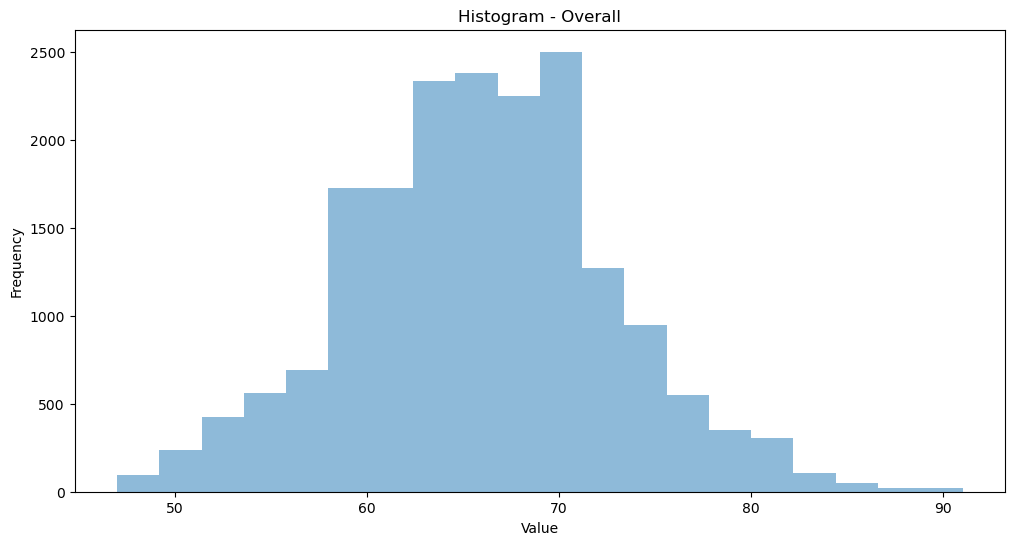

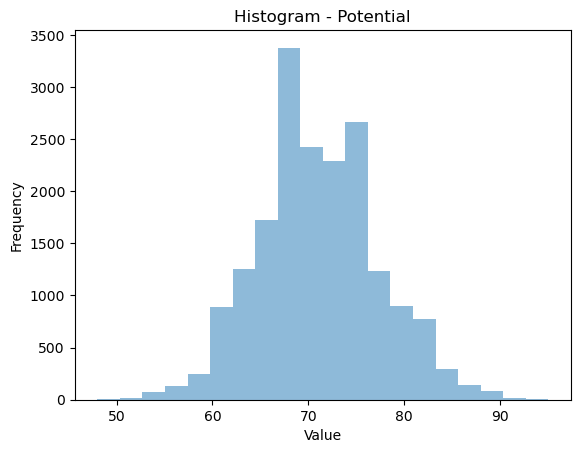

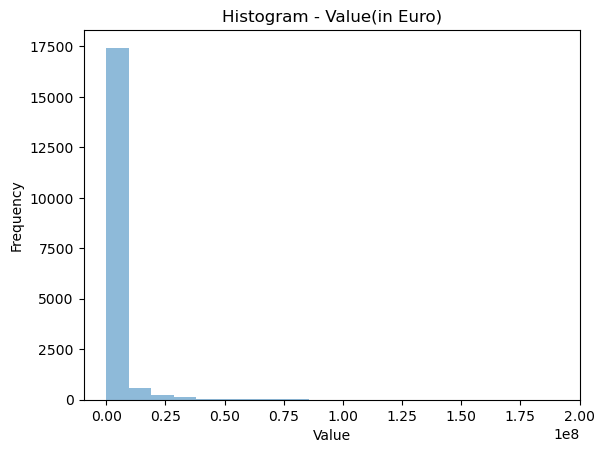

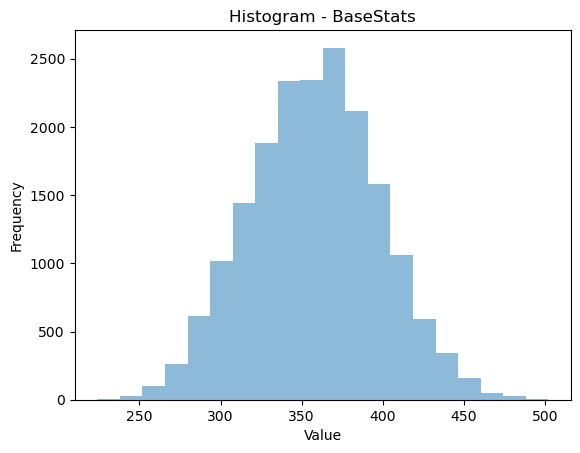

In [5]:
# Visualisasi Histogram
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.hist(data[column], bins=20, alpha=0.5)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram - {}'.format(column))
    plt.show()

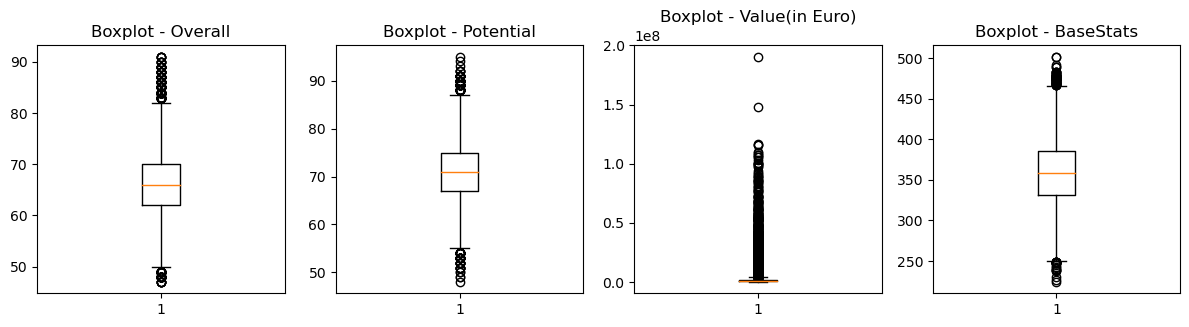

In [6]:
# Visualisasi Boxplot untuk setiap variabel
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.columns):
    plt.subplot(2, 4, i+1)
    plt.boxplot(data[column])
    plt.title('Boxplot - {}'.format(column))
plt.tight_layout()
plt.show()

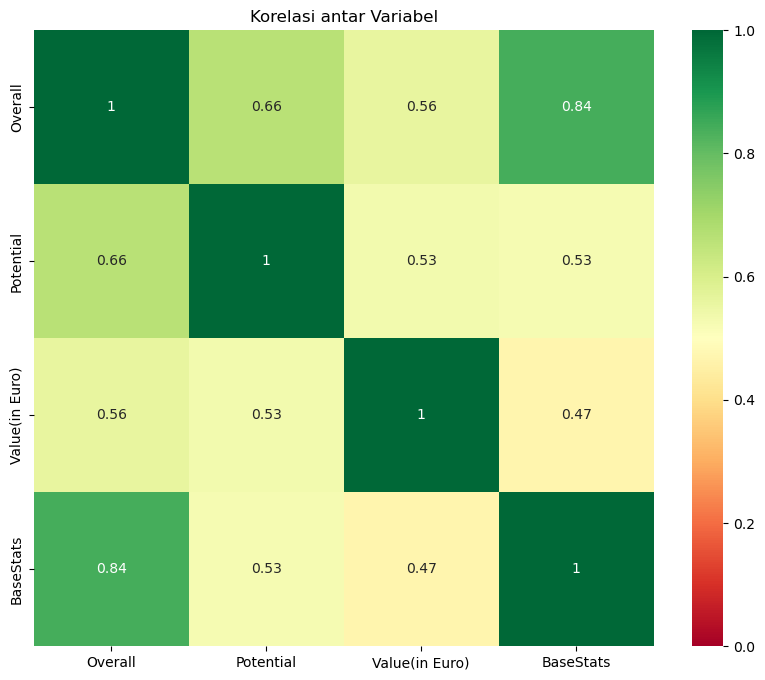

In [8]:
# Menghitung koefisien korelasi menggunakan metode Pearson
correlation_matrix = data.corr()

# Menampilkan heatmap matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin = 0 , vmax = 1)
plt.title('Korelasi antar Variabel')
plt.show()

Hasil Regresi untuk: Potential
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.932e+06
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:27:59   Log-Likelihood:                         -57040.
No. Observations:               18539   AIC:                                  1.141e+05
Df Residuals:                   18538   BIC:                                  1.141e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

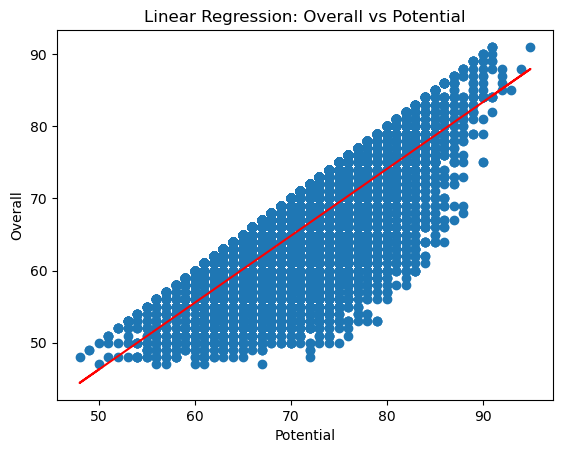

Hasil Regresi untuk: Value(in Euro)
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.164
Model:                            OLS   Adj. R-squared (uncentered):              0.164
Method:                 Least Squares   F-statistic:                              3626.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:27:59   Log-Likelihood:                     -1.0238e+05
No. Observations:               18539   AIC:                                  2.048e+05
Df Residuals:                   18538   BIC:                                  2.048e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-

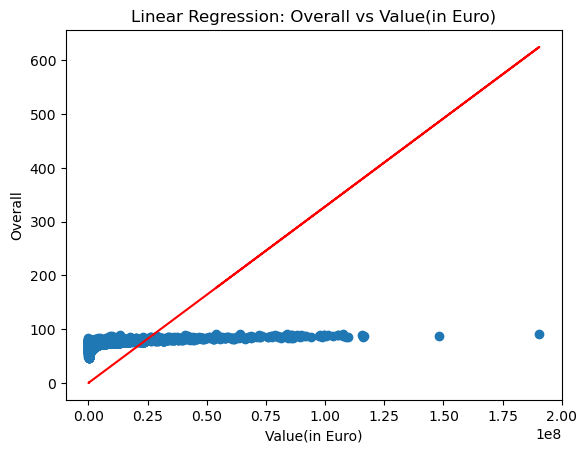

Hasil Regresi untuk: BaseStats
                                 OLS Regression Results                                
Dep. Variable:                Overall   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.159e+06
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:28:00   Log-Likelihood:                         -51825.
No. Observations:               18539   AIC:                                  1.037e+05
Df Residuals:                   18538   BIC:                                  1.037e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

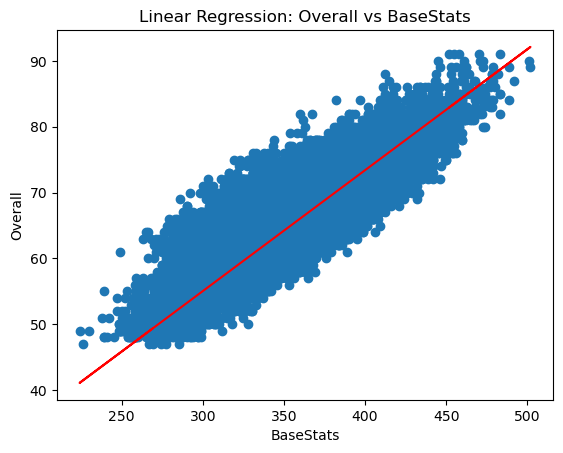

In [9]:
# Menentukan variabel dependen
dependent_variable = 'Overall'

# Melakukan regresi linear bertahap untuk setiap variabel
for feature in features:
    if feature != dependent_variable:
        print("==========================================")
        print("Hasil Regresi untuk:", feature)
        print("==========================================")

        # Menambahkan kolom konstanta untuk regresi
        data['Constant'] = 1

        # Inisialisasi model regresi linear bertahap
        model = sm.OLS(data[dependent_variable], data[feature])

        # Melakukan regresi linear bertahap
        results = model.fit()

        # Menampilkan hasil summary model regresi
        print(results.summary())
        print("------------------------------------------")

        # Menampilkan hipotesis koefisien regresi
        print("Hipotesa:")
        print("H0: The coefficient is zero (No relationship)")
        print("H1: The coefficient is not zero (There is a relationship)")
        print("p-value:", results.pvalues[feature])
        if results.pvalues[feature] < 0.05:
            print("Kesimpulan: Tolak hipotesis nol. Ada hubungan yang signifikan.")
        else:
            print("Kesimpulan: Gagal menolak hipotesis nol. Tidak ada hubungan yang signifikan.")
        print("------------------------------------------")

        # Menghitung mean_squared_error, mean_absolute_error, r2_score, dan rmse
        y_pred = results.predict()
        mse = mean_squared_error(data[dependent_variable], y_pred)
        mae = mean_absolute_error(data[dependent_variable], y_pred)
        r2 = r2_score(data[dependent_variable], y_pred)
        rmse = mean_squared_error(data[dependent_variable], y_pred, squared=False)

        # Menampilkan hasil metrik
        print("Mean Squared Error (MSE):", mse)
        print("Mean Absolute Error (MAE):", mae)
        print("R-squared (R2 Score):", r2)
        print("Root Mean Squared Error (RMSE):", rmse)
        print("------------------------------------------")

        # Variabel yang ingin diprediksi
        if feature == "Potential":
            future_data = pd.DataFrame({feature: [75, 80, 85]})
        elif feature == "Value(in Euro)":  
            future_data = pd.DataFrame({feature: [15000000, 20000000, 50000000]})
        else:
            future_data = pd.DataFrame({feature: [300, 400, 500]})

        # Melakukan prediksi variabel "Overall"
        predicted_values = results.predict(exog=future_data)

        # Menampilkan hasil prediksi
        print("Predicted values untuk", feature, ":")
        print(predicted_values)
        print("------------------------------------------")

        
        # Plot regresi linear
        plt.figure()
        plt.scatter(data[feature], data[dependent_variable])
        plt.plot(data[feature], results.predict(), color='red')
        plt.xlabel(feature)
        plt.ylabel(dependent_variable)
        plt.title(f"Linear Regression: {dependent_variable} vs {feature}")
        plt.show()